### Data Overview ###

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Purundar\Downloads\open_parking_cam_vio.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary of the dataset to check for missing values and data types
print(df.info())

# Basic statistics
print(df.describe())

# Count missing values in each column
print(df.isnull().sum())


     plate state license_type  summons_number issue_date violation_time  \
0  KBS5937    NY          PAS      9116793377   4/2/2024         12:10P   
1  LDH5937    NY          PAS      9116793389   4/2/2024         12:15P   
2   RDMM33    FL          PAS      9116793407   4/2/2024         01:01P   
3  KBG1320    NY          PAS      9116793419   4/2/2024         01:04P   
4  KRS1134    NY          PAS      9116793420   4/2/2024         01:20P   

                        violation  fine_amount  penalty_amount  \
0              EXPIRED MUNI METER           35               0   
1  FAIL TO DSPLY MUNI METER RECPT           35               0   
2                       CROSSWALK          115               0   
3                    FIRE HYDRANT          115               0   
4  FAIL TO DSPLY MUNI METER RECPT           35               0   

   interest_amount  reduction_amount  payment_amount  amount_due  precinct  \
0                0                 0             0.0        35.0        61

### VISUALIZATIONS ###

### Voilation Counts ###

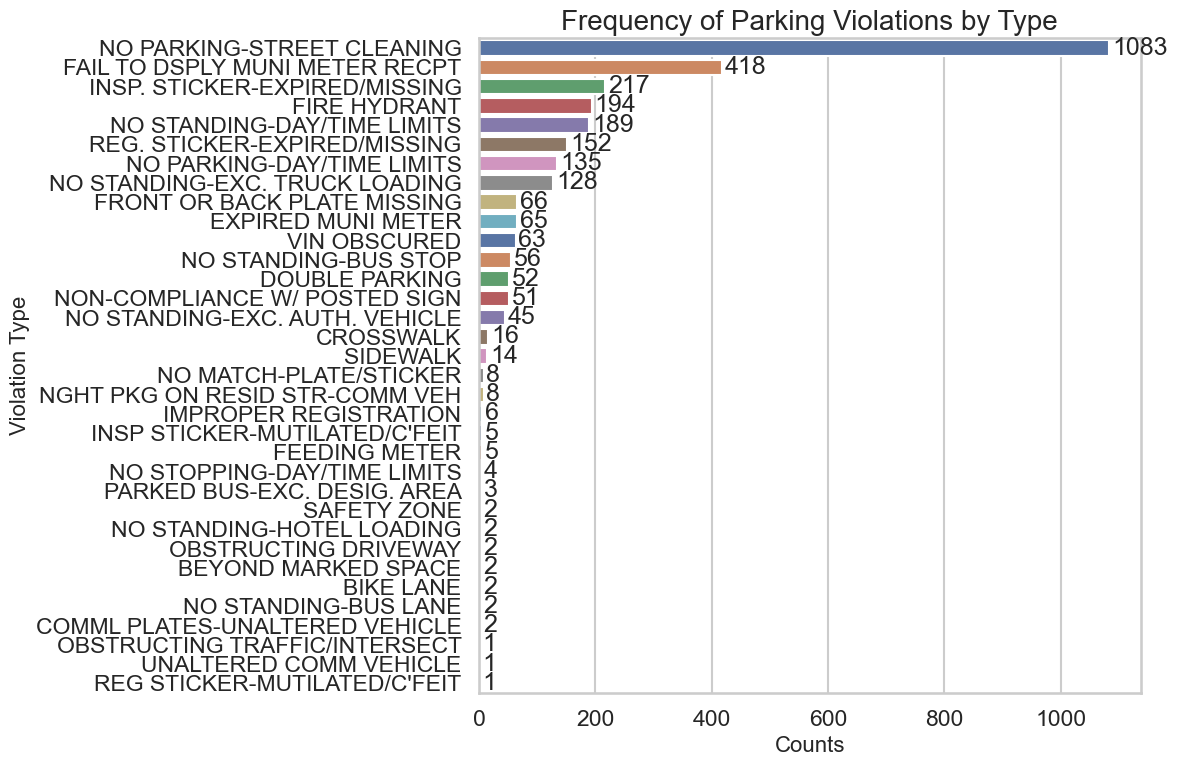

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots and set the color palette to 'deep'
sns.set(style="whitegrid")
palette = sns.color_palette("deep", n_colors=len(df['violation'].value_counts()))

# Increase default font size for all elements
sns.set_context("talk")

# Violation type counts with enhanced aesthetics and consistent color palette
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='violation', data=df, order=df['violation'].value_counts().index, palette=palette)
plt.title('Frequency of Parking Violations by Type', fontsize=20)
plt.xlabel('Counts', fontsize=16)
plt.ylabel('Violation Type', fontsize=16)

# Add annotations to each bar for clarity
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, '{:1.0f}'.format(width), va='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


### Voilations by hour of day ###

In [12]:
def convert_time_to_24h(timestr):
    if pd.isnull(timestr) or not isinstance(timestr, str):
        return None
    try:
        # Split the time into its components
        time, meridiem = timestr[:-1], timestr[-1].upper()
        hour, minute = time.split(':')
        hour = int(hour)
        minute = int(minute)

        # Convert to 24-hour format
        if meridiem == 'P' and hour != 12:
            hour += 12
        elif meridiem == 'A' and hour == 12:
            hour = 0

        return hour
    except ValueError as e:
        print(f"Error converting time: {e} (time_str: '{timestr}')")
        return None

# Apply the function to create a new 'Violation Hour' column
df['Violation Hour'] = df['violation_time'].apply(convert_time_to_24h)

# Verify non-null count
print(df['Violation Hour'].notnull().sum())


3000


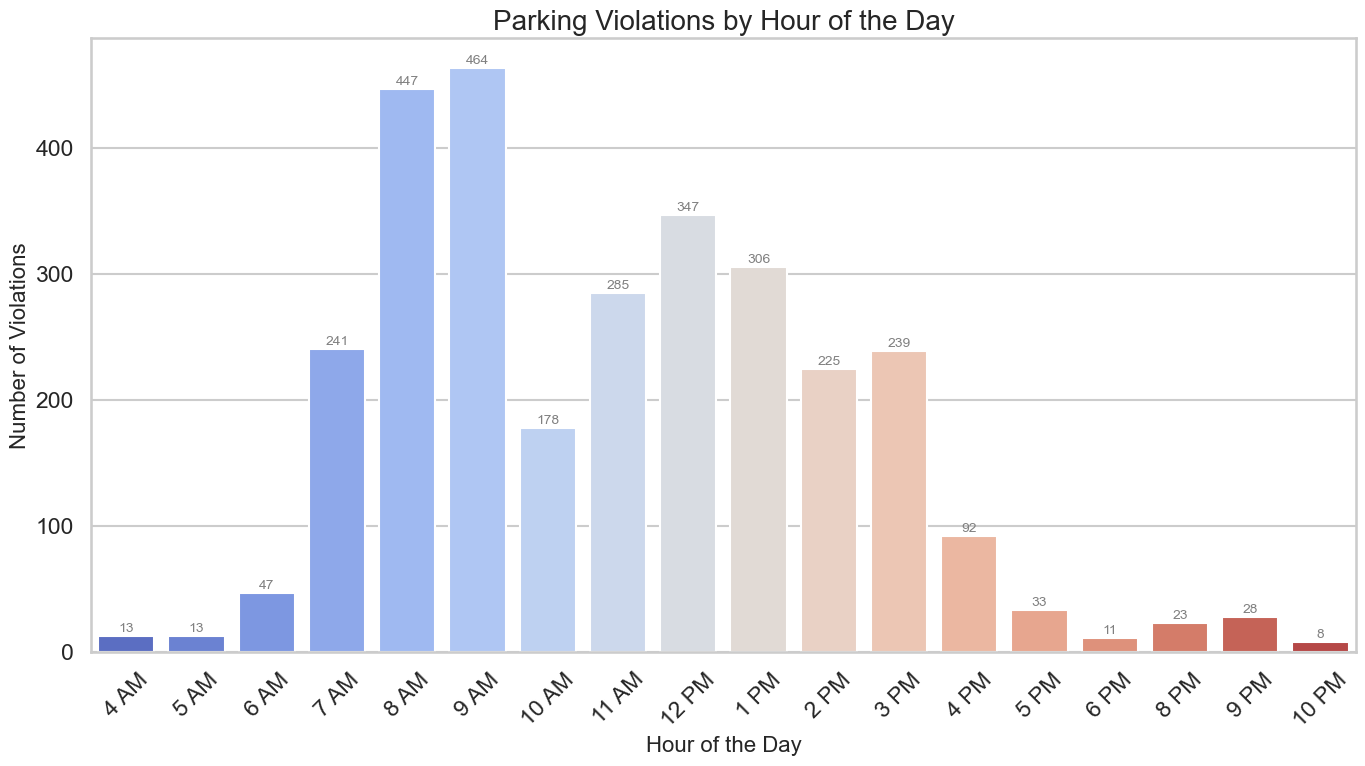

In [16]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the palette
palette = sns.color_palette("coolwarm", n_colors=len(df['Violation Hour'].dropna().unique()))

# Increase default font size for all elements
sns.set_context("talk")

# Plot the violations by hour
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Violation Hour', data=df, palette=palette, order=sorted(df['Violation Hour'].dropna().unique()))

# Custom function to convert 24h time to 12h time
def format_hour(hour):
    if hour == 0 or hour == 24:  # Midnight
        return '12 AM'
    elif hour == 12:  # Noon
        return '12 PM'
    elif hour > 12:
        return f'{hour - 12} PM'
    else:
        return f'{hour} AM'

# Get the list of unique hours sorted, then apply the custom format function
hours = sorted(df['Violation Hour'].dropna().unique())
hour_labels = [format_hour(int(hour)) for hour in hours]

# Set the custom labels on the x-axis
ax.set_xticklabels(hour_labels, rotation=45)

# Set the title and labels with increased font sizes for readability
ax.set_title('Parking Violations by Hour of the Day', fontsize=20)
ax.set_xlabel('Hour of the Day', fontsize=16)
ax.set_ylabel('Number of Violations', fontsize=16)

# Annotate the bars with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


### Time Series Analysis : Time Series Plot ###

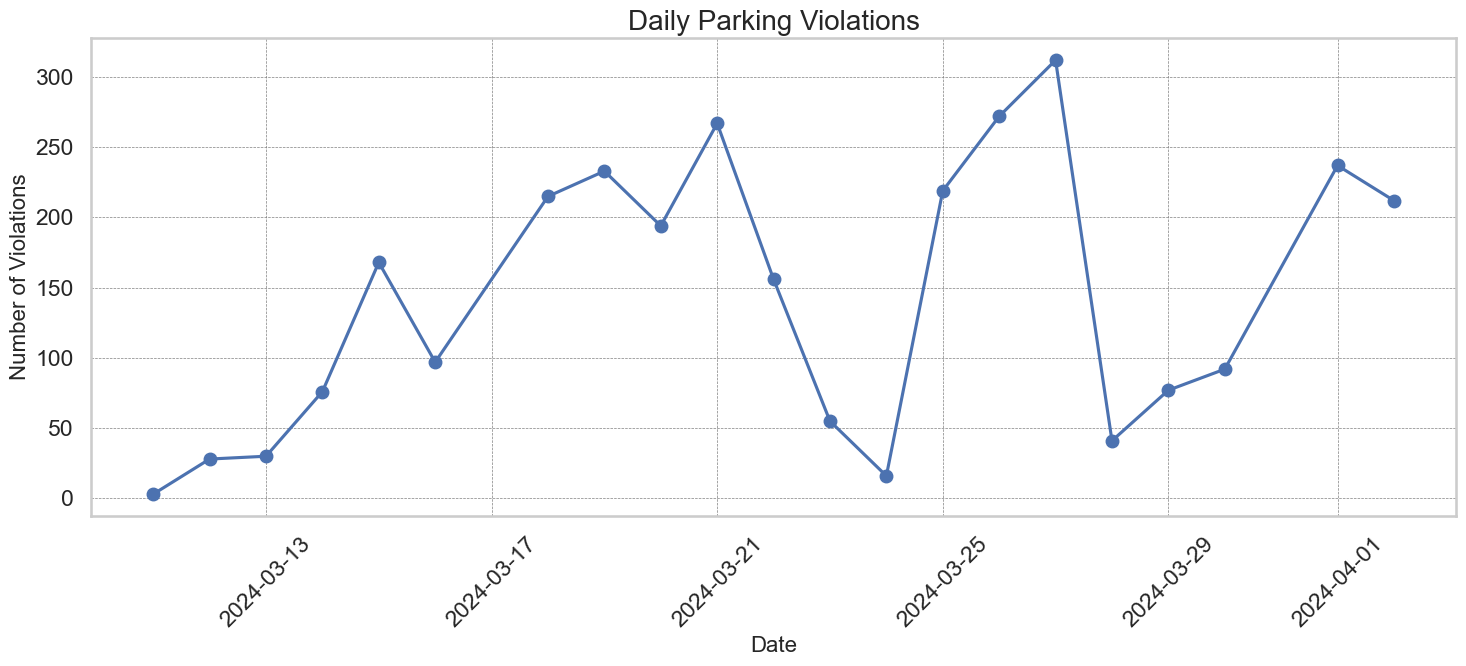

In [17]:

# Assuming df is your DataFrame and 'issue_date' is the column for the date of the violation

# Convert 'issue_date' to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'])

# Group the data by 'issue_date' and count the number of violations
daily_violations = df.groupby(df['issue_date'].dt.date).size()

# Set the aesthetic style of the plots and the color palette
sns.set(style="whitegrid")
color = sns.color_palette("deep")[0]  # Using the first color from the 'deep' palette

# Increase default font size for all elements
sns.set_context("talk")

# Create the time series plot
plt.figure(figsize=(15, 7))
daily_violations.plot(kind='line', color=color, marker='o')

# Aesthetic improvements
plt.title('Daily Parking Violations', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Violations', fontsize=16)

# Set x-ticks to be more spaced out if there are too many dates
if len(daily_violations) > 30:  # If more than a month's worth of data
    plt.xticks(ticks=pd.date_range(start=daily_violations.index.min(), end=daily_violations.index.max(), freq='MS'), rotation=45)
else:
    plt.xticks(rotation=45)

# Set the grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Ensure all plot elements are rendered correctly
plt.tight_layout()

# Show the plot
plt.show()
